# 2.1 EDA를 통해 데이터 탐색하기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'

from google.colab import drive
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 2.1.1 결측치 확인

In [4]:
# 구글 드라이브 연결
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/coaching_study/study/data/diabetes.csv')

print(df.shape)
df.head(3)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [6]:
df.info()

# Non-Null Count를 확인하면 값이 전부 채워져 있음을 알 수 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# 수치데이터 요약 확인
df.describe()

# 평균값과 중앙값의 차이가 크면 극단값이 존재함을 의미
# min값이 0이면 안될 것 같은 특성들이 0인 경우 존재 -> 결측치가 0으로 채워져 있던 것으로 보임

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
feature_list = df.columns.tolist()[:-1]
feature_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
# 결측치 의심 특성들 리스트로 저장
cols = feature_list[1:]

# 0인 값들을 nan으로 바꾸기
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()

#### 수치적으로 확인

In [10]:
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [11]:
df_null.mean()

# Insulin과 SkinThickness의 결측치 비율이 많음을 알 수 있음

Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
dtype: float64

#### 시각적으로 확인

<Axes: >

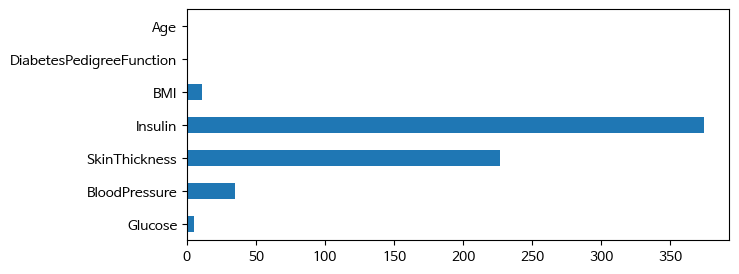

In [12]:
plt.figure(figsize=(7, 3))
df_null.sum().plot.barh()

<Axes: >

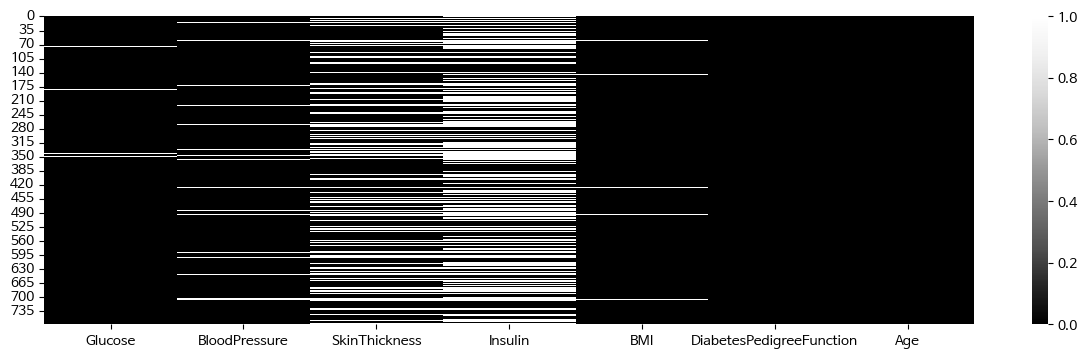

In [13]:
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap='Greys_r')

# 시각적으로 봐도 Insulin과 SkinThickness의 결측치가 상당히 많음

## 2.1.2 시각화를 통한 데이터 탐색

In [14]:
# target 비율 확인
df['Outcome'].value_counts(normalize=True)

# 당뇨병이 아닌 사람의 데이터가 더 많음

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [15]:
# 임신횟수와 정답값 비교
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count']).reset_index()
df_po

# 임신횟수가 많아잘수록 표본이 줄어드는 것을 알 수 있음

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


Text(0.5, 1.0, '임신 횟수에 따른 당뇨병 환자 수')

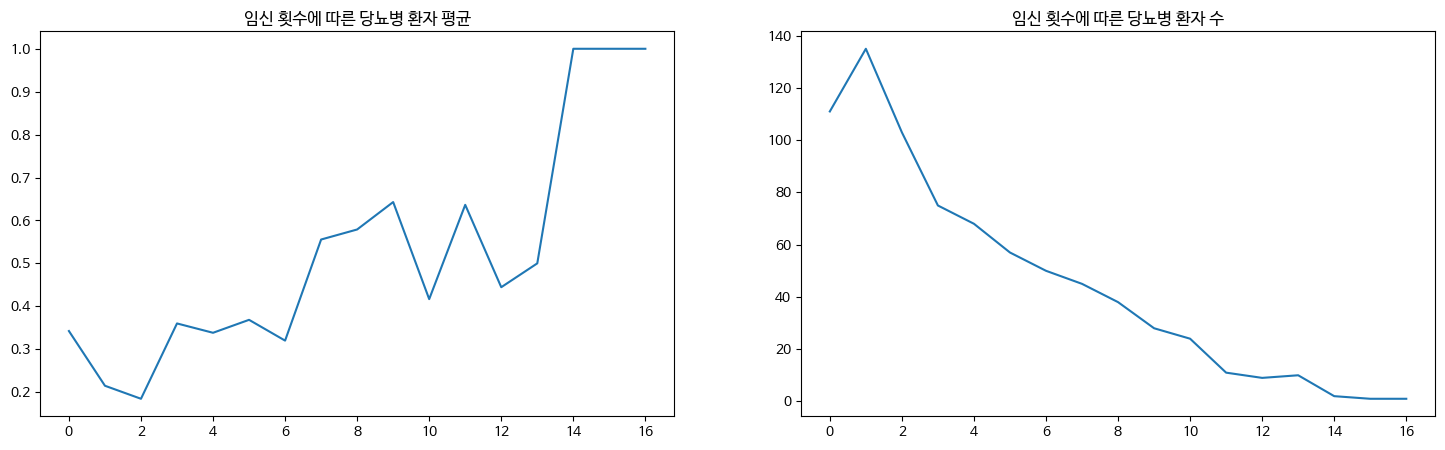

In [16]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(df_po['mean'])
ax2.plot(df_po['count'])

ax1.set_title('임신 횟수에 따른 당뇨병 환자 평균')
ax2.set_title('임신 횟수에 따른 당뇨병 환자 수')

# 임신 횟수가 많아질수록 당뇨병에 걸린 사람들이 많지만 표본수는 적어짐

#### barplot

Text(0.5, 1.0, '임신 횟수에 따른 당뇨병 발병 유무')

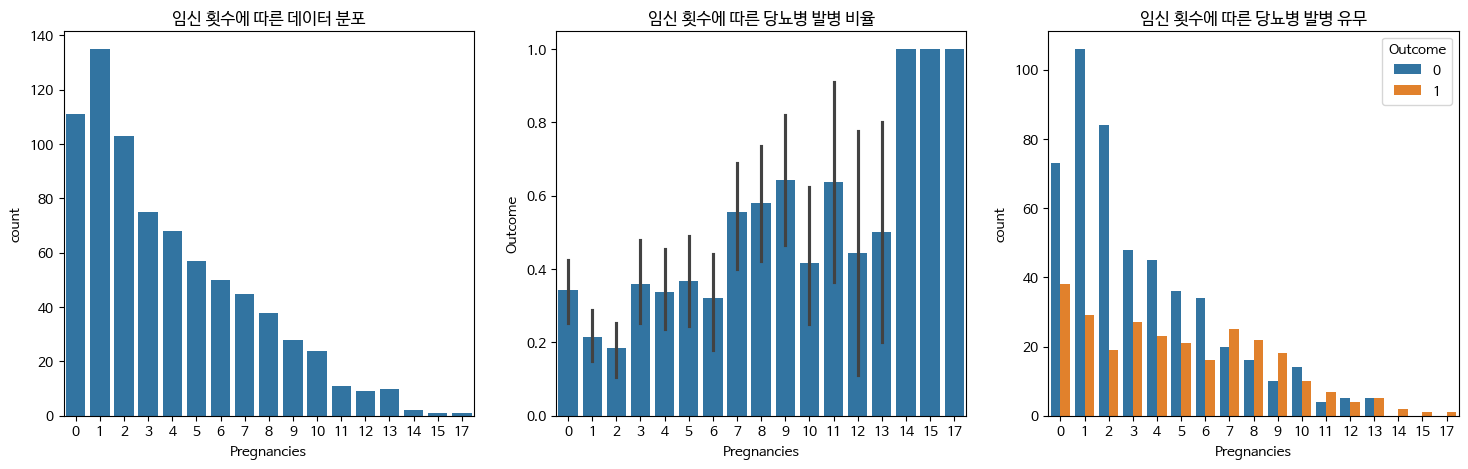

In [17]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(df, x='Pregnancies', ax=ax1)
sns.barplot(df, x='Pregnancies', y='Outcome', ax=ax2)
sns.countplot(df, x='Pregnancies', hue='Outcome', ax=ax3)

ax1.set_title('임신 횟수에 따른 데이터 분포')
ax2.set_title('임신 횟수에 따른 당뇨병 발병 비율')
ax3.set_title('임신 횟수에 따른 당뇨병 발병 유무')

# 임신횟수 0회-2회 정도에 데이터가 몰려있음
# 임신 7회 이상부터 당뇨병인 환자가 아닌 환자보다 많아짐

In [18]:
# 임신횟수 범주화 시키기(7회 이상부터 역전되므로 7을 기준으로 범주화해보자)
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']].head(3)

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True


<Axes: xlabel='Pregnancies_high', ylabel='count'>

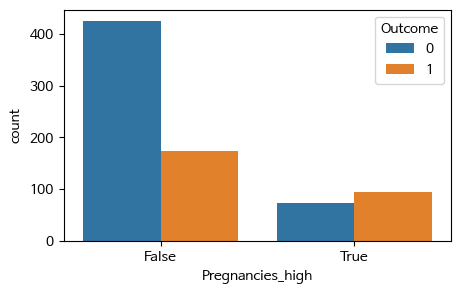

In [19]:
fig = plt.figure(figsize=(5, 3))
sns.countplot(df, x='Pregnancies_high', hue='Outcome')

Text(0.5, 1.0, 'Insulin에 따른 당뇨병 유무 차이')

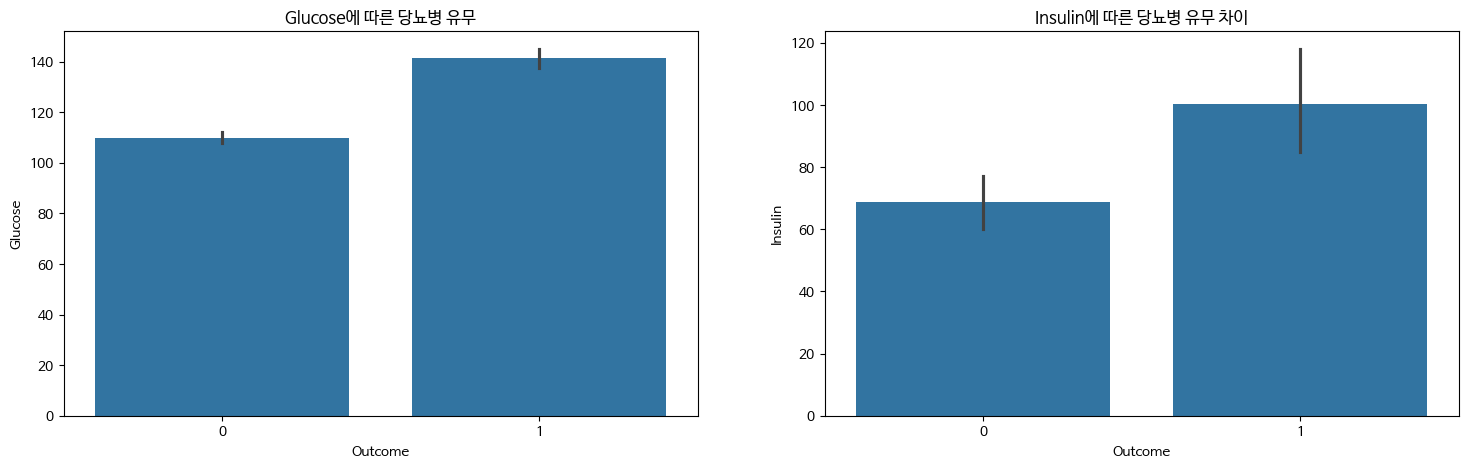

In [20]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.barplot(df, x='Outcome', y='Glucose', ax=ax1)
sns.barplot(df, x='Outcome', y='Insulin', ax=ax2)

ax1.set_title('Glucose에 따른 당뇨병 유무')
ax2.set_title('Insulin에 따른 당뇨병 유무 차이')

Text(0.5, 1.0, '임신 횟수에 따른 Insulin 수치')

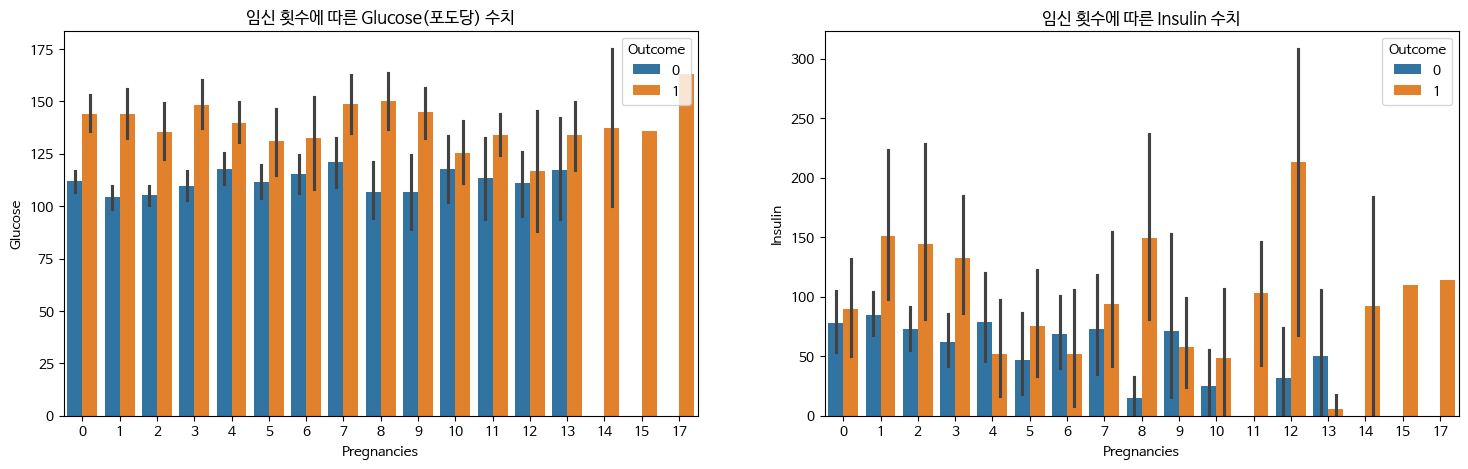

In [21]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.barplot(df, x='Pregnancies', y='Glucose', hue='Outcome', ax=ax1)
sns.barplot(df, x='Pregnancies', y='Insulin', hue='Outcome', ax=ax2)

ax1.set_title('임신 횟수에 따른 Glucose(포도당) 수치')
ax2.set_title('임신 횟수에 따른 Insulin 수치')

#### boxplot

Text(0.5, 1.0, '임신 횟수에 따른 Insulin 분포(결측치 0제외)')

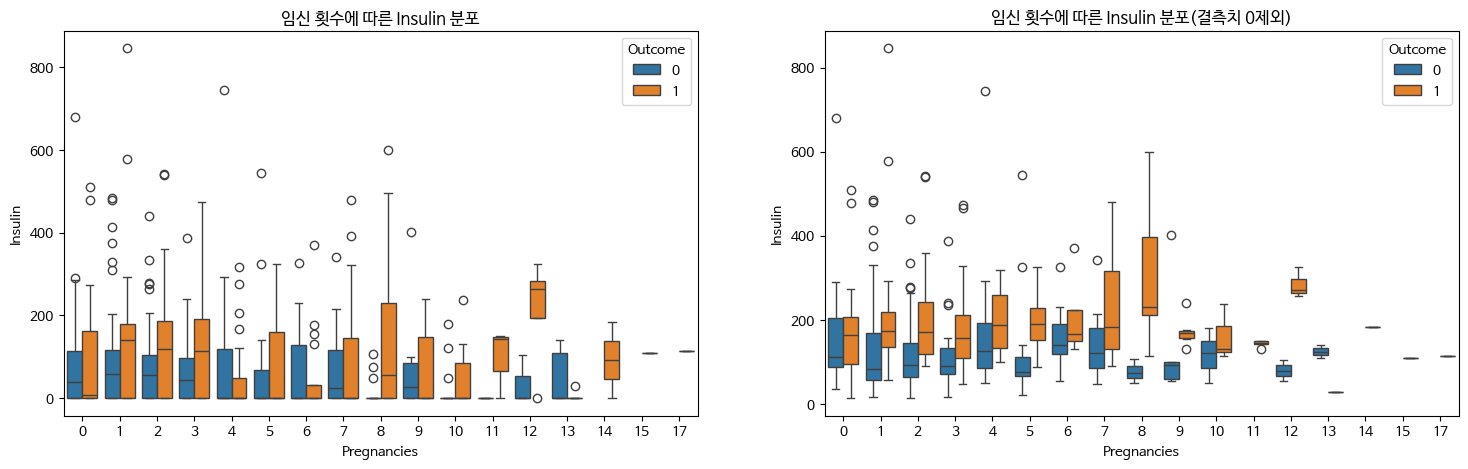

In [22]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(df, x='Pregnancies', y='Insulin', hue='Outcome', ax=ax1)
sns.boxplot(df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome', ax=ax2)

ax1.set_title('임신 횟수에 따른 Insulin 분포')
ax2.set_title('임신 횟수에 따른 Insulin 분포(결측치 0제외)')

# 0을 제거 하기 전에는 박스 플롯이 바닥으로 치우쳐 있음
# 제거 후 분포가 제거 전보다 고르게 분포

#### violinplot & swarmplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

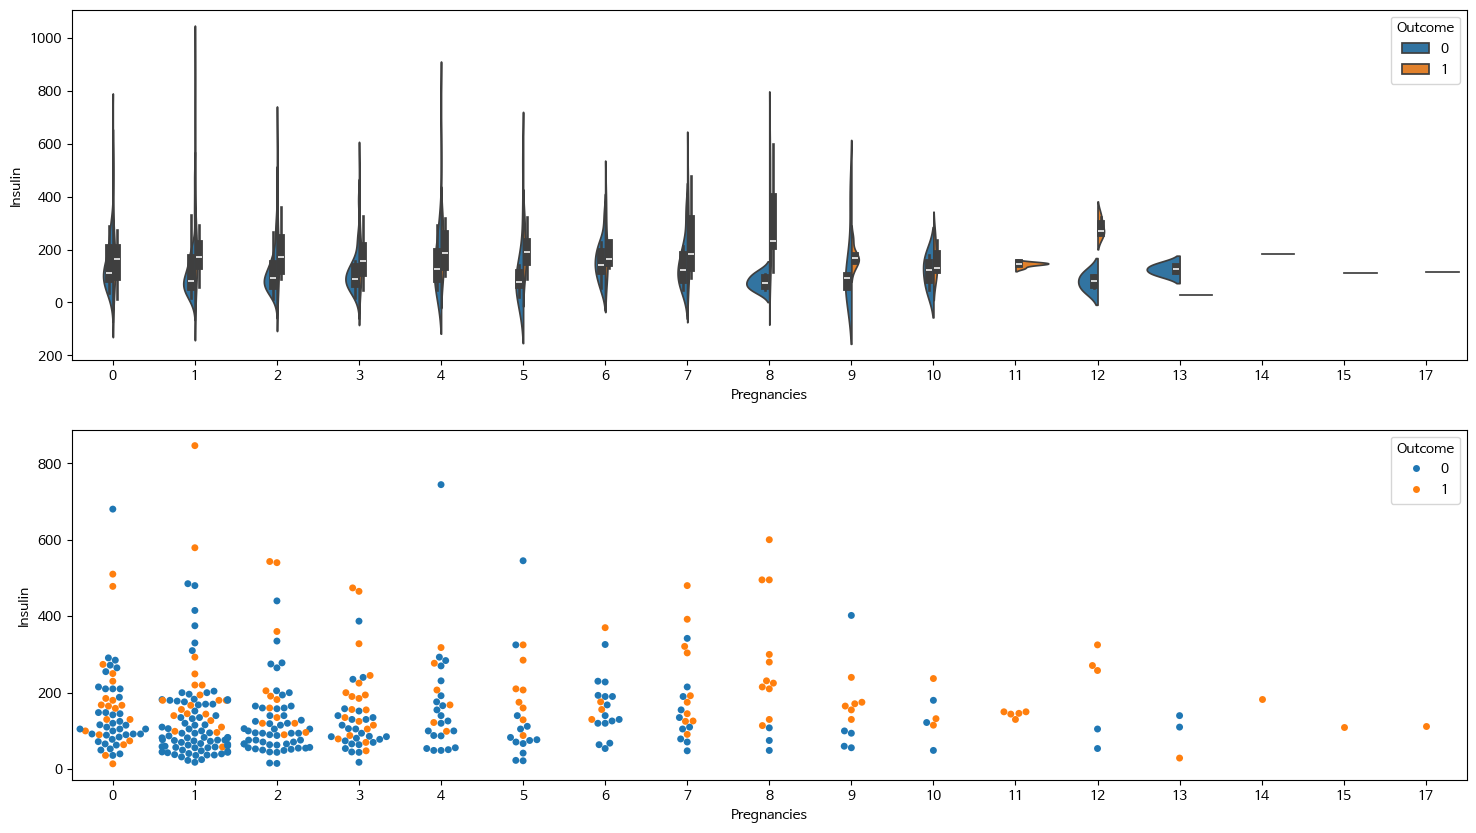

In [23]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.violinplot(df[df['Insulin']>0], x='Pregnancies', y='Insulin',
               hue='Outcome', split=True, ax=ax1)
sns.swarmplot(df[df['Insulin']>0], x='Pregnancies', y='Insulin',
              hue='Outcome', ax=ax2)

# 당뇨병 발병 여부에 따라 인슐린 수치 분포가 다름을 알 수 있음
# swarmplot을 통한 산포도를 이용하면 데이터의 수도 확인 가능

#### distplot

In [24]:
# 당뇨병 발병 여부에 따라 데이터 분리
df_0 = df[df['Outcome']==0]
df_1 = df[df['Outcome']==1]

df_0.shape, df_1.shape

((500, 10), (268, 10))

Text(0.5, 1.0, '나이에 따른 당뇨병 발병 여부')

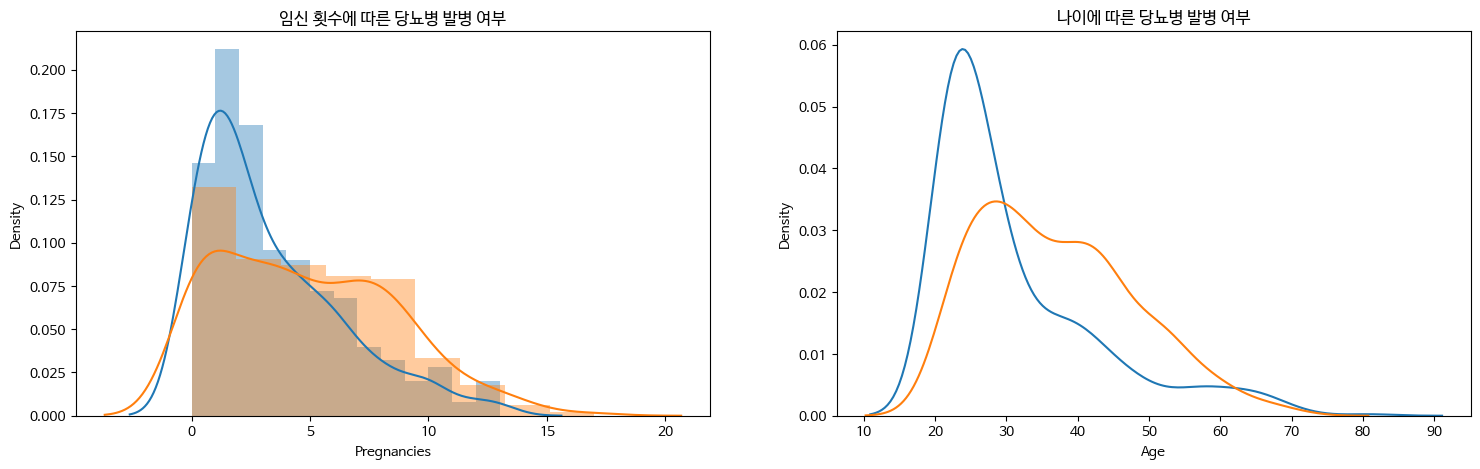

In [25]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(df_0['Pregnancies'], label=0, ax=ax1)
sns.distplot(df_1['Pregnancies'], label=1, ax=ax1)

sns.distplot(df_0['Age'], hist=False, label=0, ax=ax2)
sns.distplot(df_1['Age'], hist=False, label=1, ax=ax2)

ax1.set_title('임신 횟수에 따른 당뇨병 발병 여부')
ax2.set_title('나이에 따른 당뇨병 발병 여부')

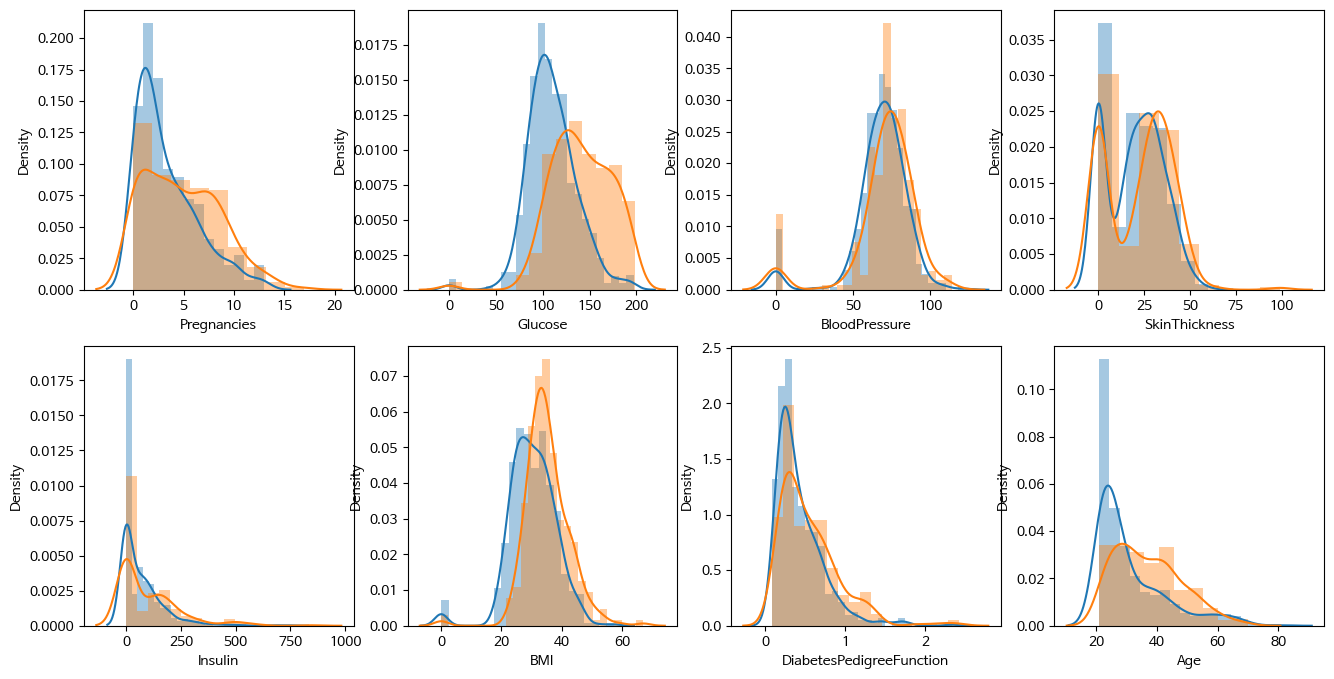

In [35]:
df_col = df.columns.tolist()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, col_name in enumerate(df_col[:-2]):
  row = i // 4
  col = i % 4
  sns.distplot(df_0[col_name], ax=axes[row][col])
  sns.distplot(df_1[col_name], ax=axes[row][col])

# 당뇨병 유무에 따라 분포도가 달라지는 변수들이 있음을 알 수 있다
# DecisionTree이용 시 범주형으로 나누는게 학습 성능에 좋으므로 범주로 나눌 수 있는 건 나눠보자!
# Glucose가 가장 큰 차이를 보이는 듯 하다
# Glucose, BloodPressure, SkinThickness, Insulin, BMI에 0인 값이 많은 것으로 보아 결측치가 존재함을 알 수 있다(처리 필요)

#### lmplot

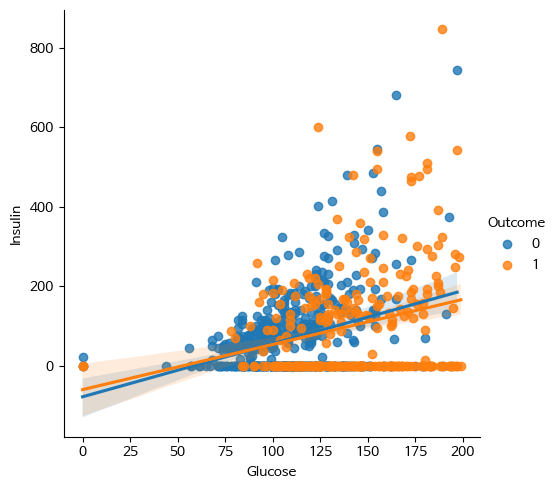

In [43]:
sns.lmplot(data=df, x='Glucose', y='Insulin', hue="Outcome")

# regplot()은 hue 파라미터가 없다. 구분해서 보고 싶으면 lmplot() 사용!

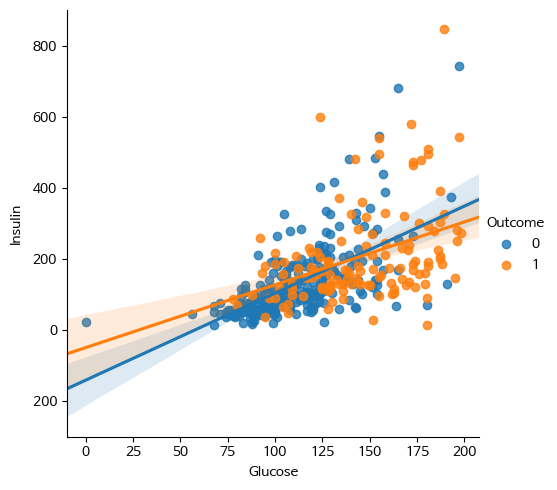

In [47]:
sns.lmplot(data=df[df['Insulin'] > 0], x='Glucose', y='Insulin', hue="Outcome", truncate=False)

# 양의 상관관계를 보임

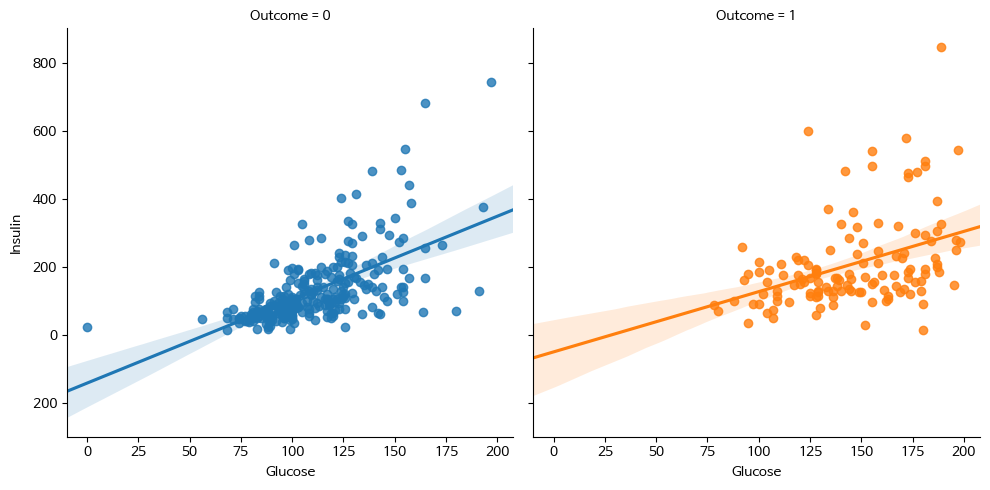

In [65]:
sns.lmplot(data=df[df['Insulin'] > 0], x='Glucose', y='Insulin',
           hue="Outcome", col='Outcome', truncate=False)

#### pairplot

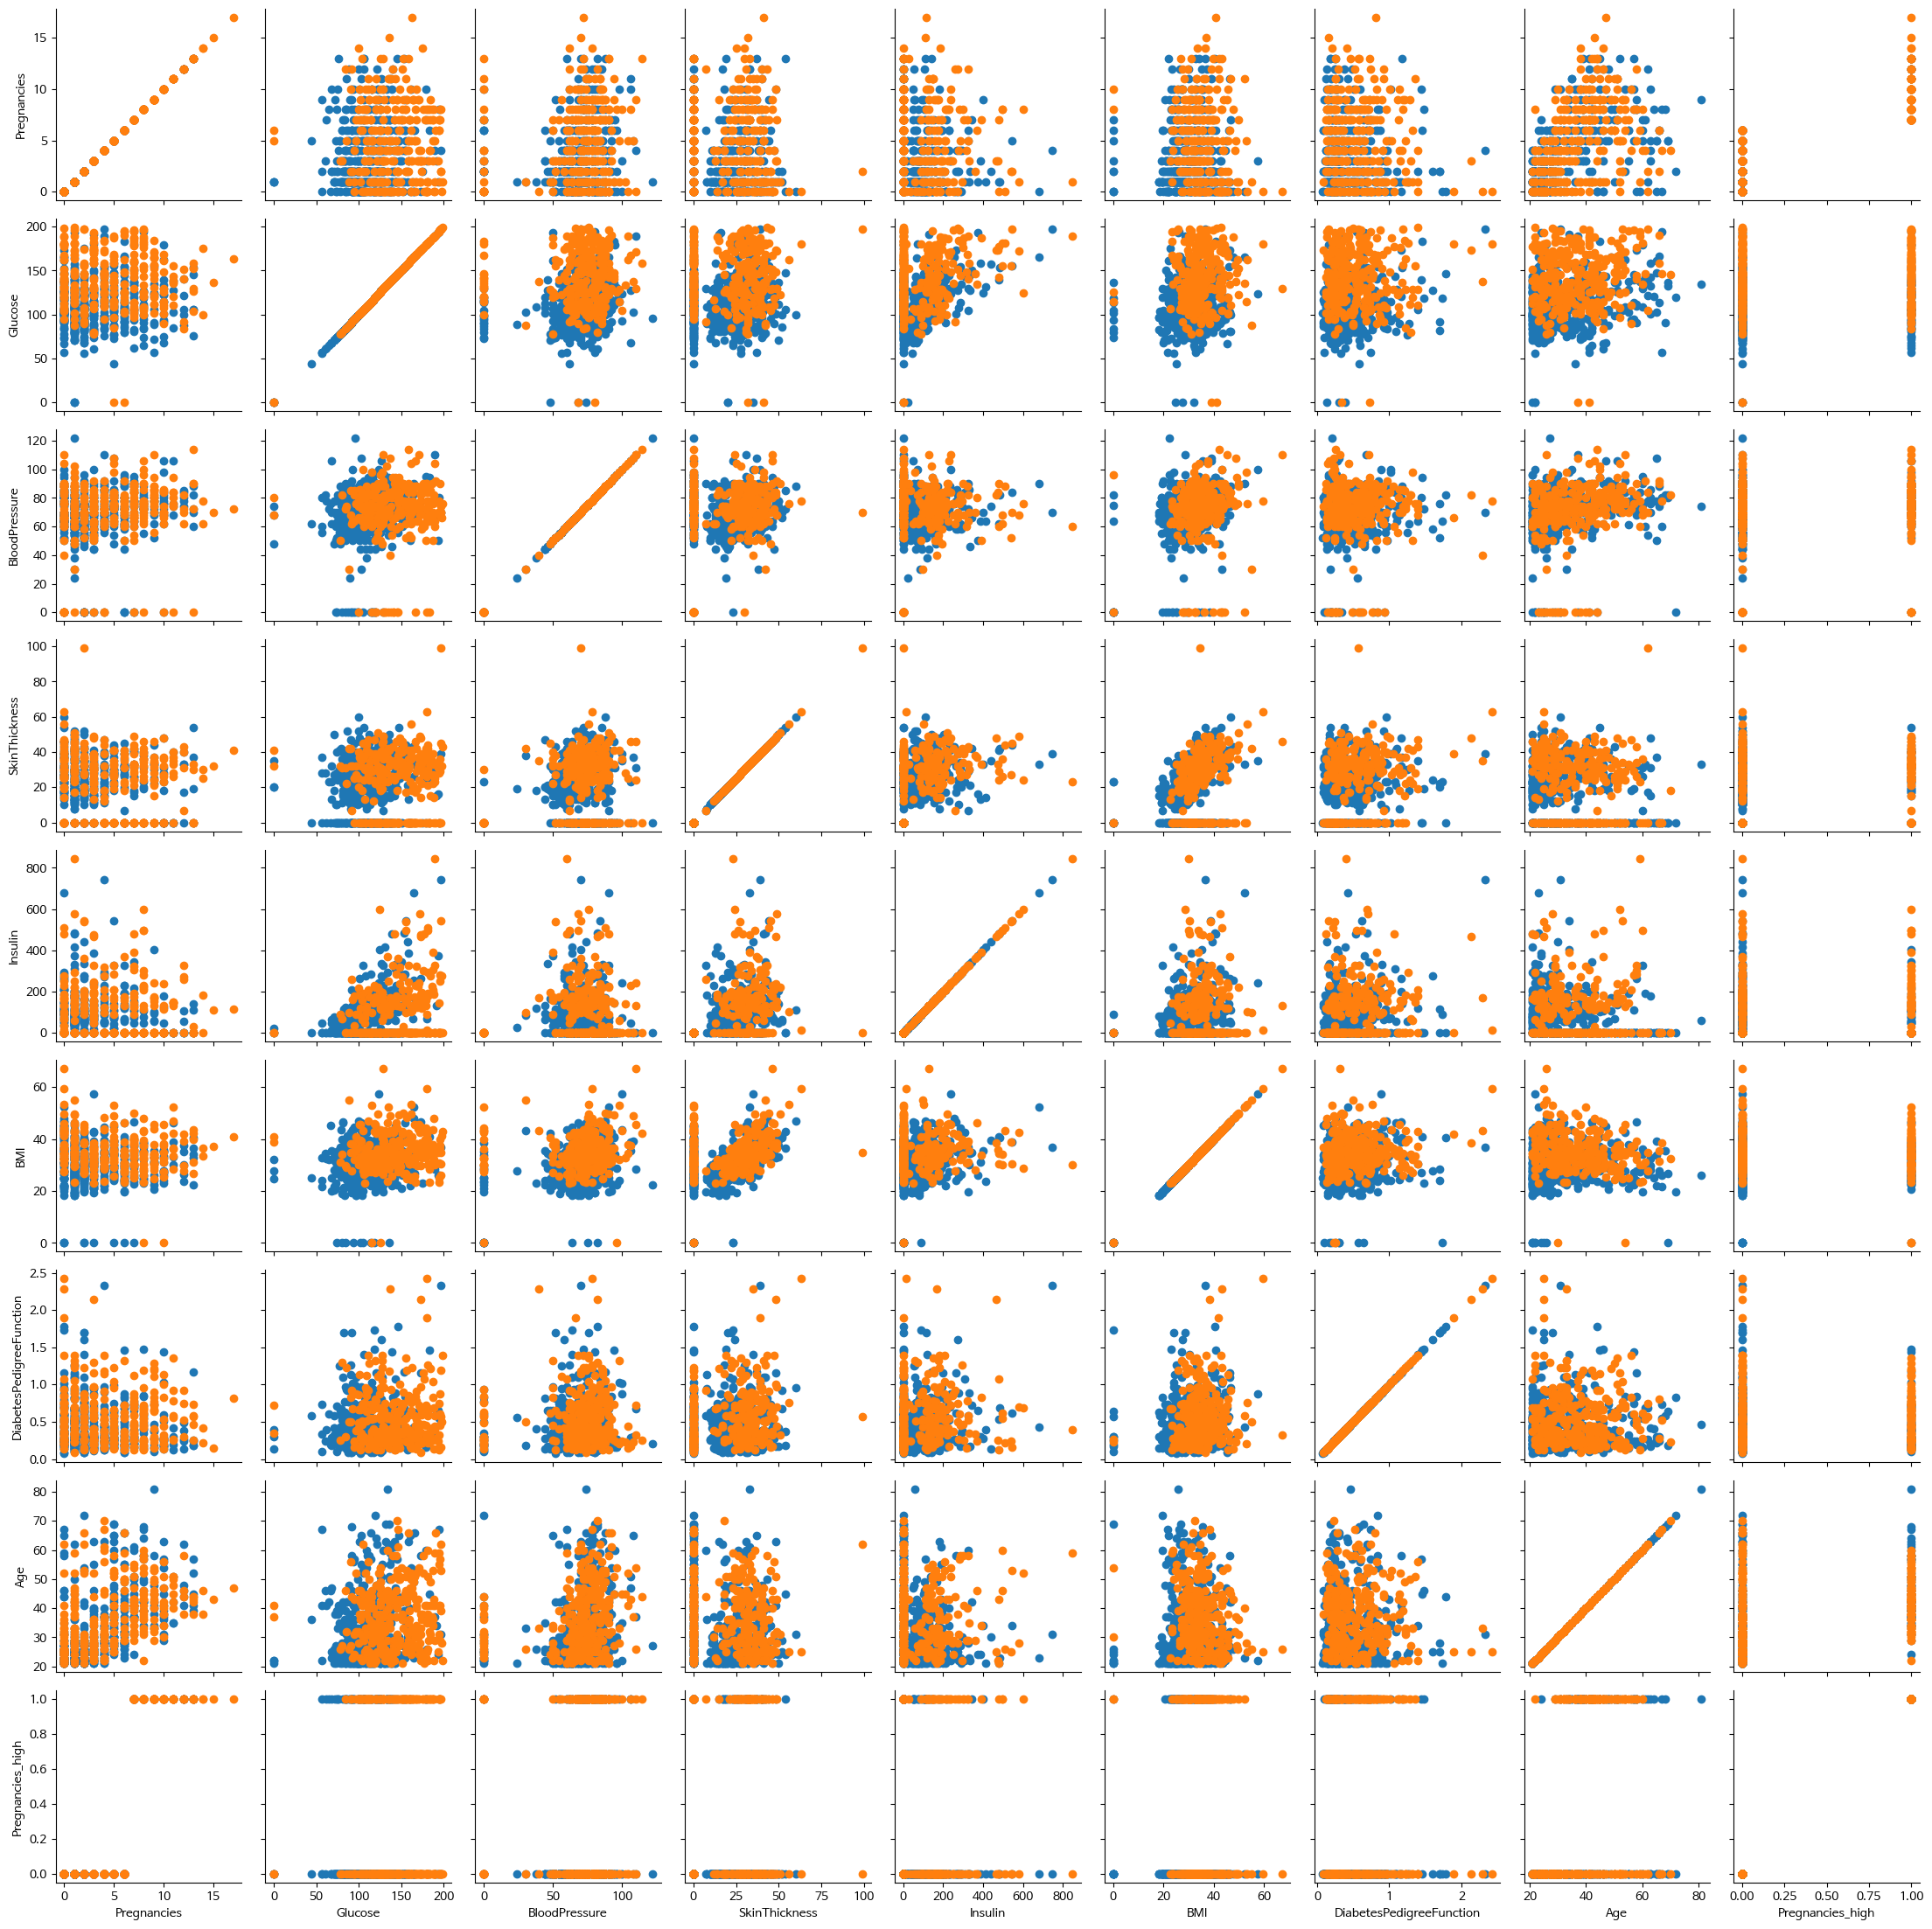

In [50]:
p = sns.PairGrid(df, hue='Outcome')
p.map(plt.scatter)

## 2.1.3 상관계수 분석

#### 결측치 포함

In [52]:
df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


<Axes: >

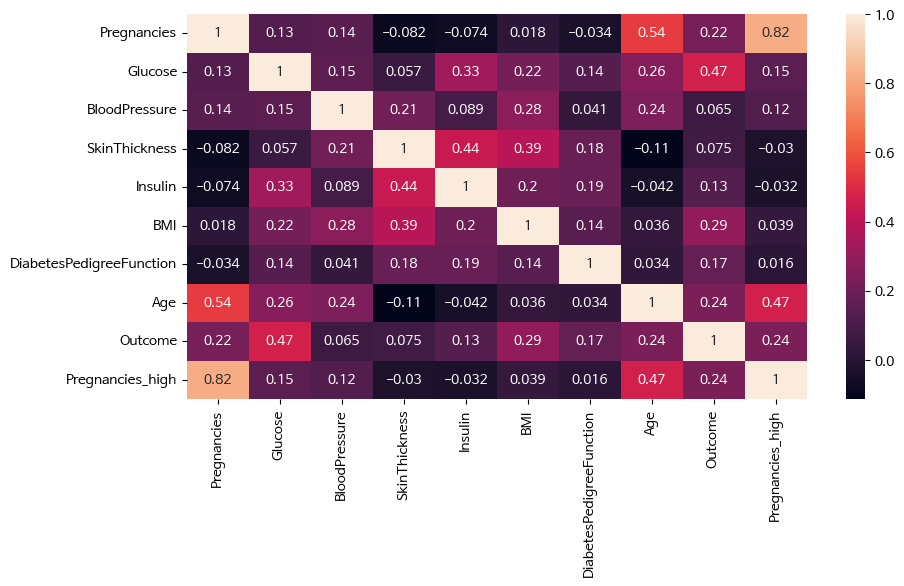

In [57]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_corr, annot=True)

#### 결측치 제외

In [61]:
df_matrix = df[df.columns.tolist()[:-2]].replace(0, np.nan)
df_matrix['Outcome'] = df['Outcome']

In [62]:
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

# 결측치 제거 전과 상관관계정도가 달라진 것을 알 수 있다

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<Axes: >

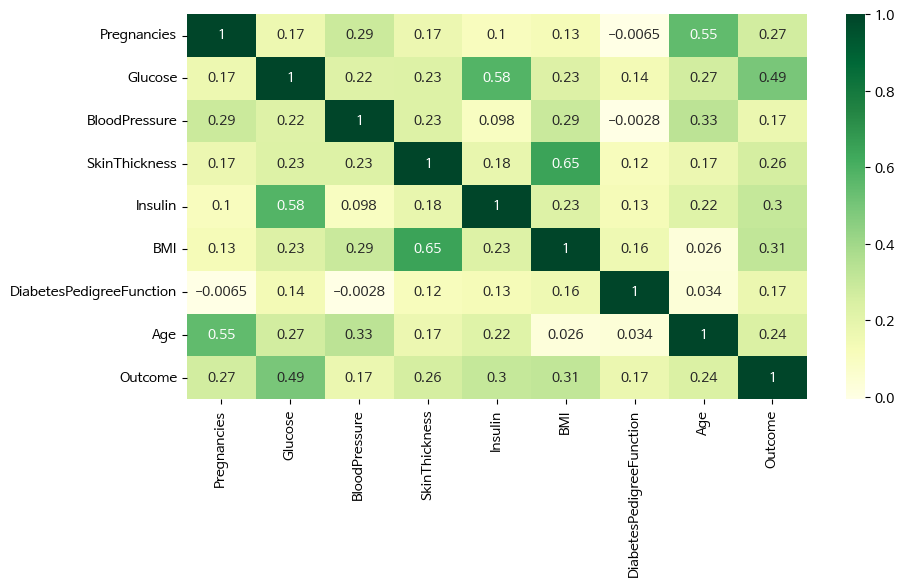

In [64]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_corr, annot=True, cmap='YlGn')